<center><img src="https://semcomp-epcc-unsa.github.io/assets/images/cslogos/logo-only.png" width="120">


$\tiny{Universidad \ Nacional \ de \ San \ Agustín \ de \ Arequipa \\
Escuela \ Profesional \ de \ Ciencia \ de \ la \ Computación  }$

---

 <center>
 $\LARGE{Laboratorio \ 06}$
 </center>


**Curso:** *Física Computacional*

**Profesor:** *Apaza Veliz, Danny Giancarlo*

**Alumno:** *Nifla Llallacachi, Manuel Angel* \\

**LINK Colab:** [*Lab06_Física_Computacional_2023B*](https://colab.research.google.com/drive/16LJRI_GvB_BK23mEWUQbBzFxyLXRs6l9?usp=sharing)

\\

---

\\

#### **Ejercicios:**

1.   Escriba un código que permita resolver la ecuación de calor para cualquier condición de contorno y condición inicial.
 <center>
 $u_{i,j+1} = (1 − 2r)u_{i,j} + r(u_{i+1,j} − 2u_{i,j} + u_{i−1,j} )$
 </center>

2.   Escriba un código que permita resolver la ecuación de onda para cualquier condición de contorno y condición inicial.
 <center>
 $u_{i,j+1} = 2(1 − r^2)u_{i,j} + r^2(u_{i+1,j} + u_{i−1,j} ) − u_{i,j−1}$
 </center>


\\

-------------------
\\


### $SOLUCION \ EJERCICIO \ 1 $


##***ANALISIS:***


La ecuación de calor a implementar se utiliza para modelar la difusión del calor en una malla discreta. Para resolver esta ecuación numéricamente se usará un enfoque de iteración en el tiempo.

**Datos:**

*   $N:$ Número de puntos en el eje x
*   $M:$ Número de puntos en el eje y (tiempo)
*   $r:$ Parámetro de estabilidad $(r = alpha * dt / dx^2)$


###***CODIGO :***

N: 50
M: 100
Coeficiente de difusión: 0.01
Longitud del dominio espacial: 1.0
Tiempo total de simulación: 1.0


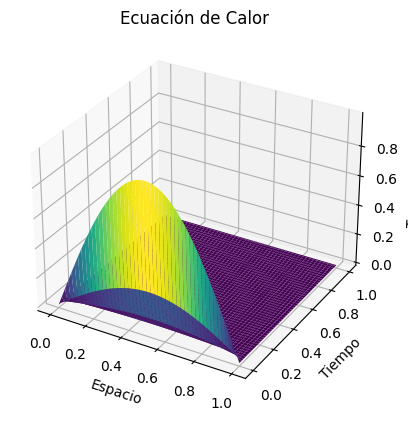

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Resuelve la ecuación de calor en una malla NxM.
def Sol_Ecuacion_Calor(N, M, r, Condicion_Contorno, Condicion_Inicial):
    u = np.zeros((M, N))
    u[0, :] = Condicion_Inicial(np.linspace(0, 1, N))
    for j in range(0, M - 1):
        u[j + 1, 0] = Condicion_Contorno(j + 1)
        u[j + 1, -1] = Condicion_Contorno(j + 1)
        for i in range(1, N - 1):
            u[j + 1, i] = (1 - 2 * r) * u[j, i] + r * (u[j, i - 1] - 2 * u[j, i] + u[j, i + 1])

    return u

# Condición inicial (función que toma el espacio y devuelve un array de N elementos)
def Condicion_Inicial(x):
    return np.sin(np.pi * x)

# Condición de contorno (función que toma el tiempo y devuelve un array de N elementos)
def Condicion_Contorno(t):
    return 0.0

# Parámetros del problema
N = int(input("N: "))  # Número de puntos en el eje x
M = int(input("M: "))  # Número de puntos en el eje y (tiempo)
alpha = float(input("Coeficiente de difusión: "))  # Coeficiente de difusión
L = float(input("Longitud del dominio espacial: "))  # Longitud del dominio espacial
T = float(input("Tiempo total de simulación: "))  # Tiempo total de simulación
dx = L / (N - 1)
dt = T / (M - 1)
r = alpha * dt / dx**2

solution = Sol_Ecuacion_Calor(N, M, r, Condicion_Contorno, Condicion_Inicial)

#############GRAFICO###############
x = np.linspace(0, L, N)
t = np.linspace(0, T, M)
X, T = np.meshgrid(x, t)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, T, solution, cmap='viridis')
ax.set_xlabel('Espacio')
ax.set_ylabel('Tiempo')
ax.set_zlabel('Temperatura')
ax.set_title('Ecuación de Calor')

plt.show()


\\

-------------------
\\


### $SOLUCION \ EJERCICIO \ 2 $


##***ANALISIS:***

**Datos:**

*   $N:$ Número de puntos en el eje x
*   $M:$ Número de puntos en el eje y (tiempo)
*   $r:$ Parámetro de estabilidad $(r = c * dt / dx)$


###***CODIGO :***

N: 50
M: 100
Velocidad de propagación de la onda: 1.0
Longitud del dominio espacial: 1.0
Tiempo total de simulación: 1.0


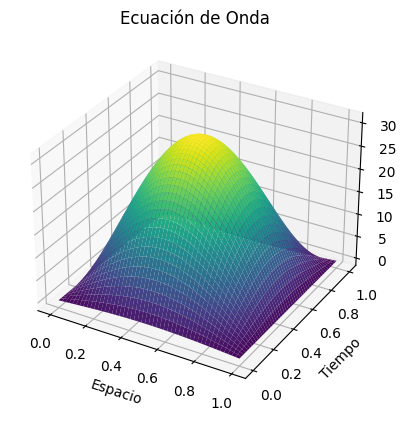

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Resuelve la ecuación de onda en una malla NxM.
def solve_wave_equation(N, M, r, Condicion_Contorno, Condicion_Inicial, Velocidad_Inicial):
    u = np.zeros((M, N))
    v = np.zeros((M, N))
    u[0, :] = Condicion_Inicial(np.linspace(0, 1, N))
    v[0, :] = Velocidad_Inicial(np.linspace(0, 1, N))
    for j in range(0, M - 1):
        u[j + 1, 0] = Condicion_Contorno(j + 1)
        u[j + 1, -1] = Condicion_Contorno(j + 1)
        for i in range(1, N - 1):
            u[j + 1, i] = 2 * (1 - r**2) * u[j, i] + r**2 * (u[j, i + 1] + u[j, i - 1]) - u[j - 1, i]

    return u

# Condición inicial (función que toma el espacio y devuelve un array de N elementos)
def Condicion_Inicial(x):
    return np.sin(np.pi * x)

# Condición de contorno (función que toma el tiempo y devuelve un array de N elementos)
def Condicion_Contorno(t):
    return 0.0

# Derivada temporal inicial (función que toma el espacio y devuelve un array de N elementos)
def Velocidad_Inicial(x):
    return np.zeros_like(x)

# Parámetros del problema
N = int(input("N: "))  # Número de puntos en el eje x
M = int(input("M: "))  # Número de puntos en el eje y (tiempo)
c = float(input("Velocidad de propagación de la onda: "))  # Velocidad de propagación de la onda
L = float(input("Longitud del dominio espacial: "))  # Longitud del dominio espacial
T = float(input("Tiempo total de simulación: "))  # Tiempo total de simulación
dx = L / (N - 1)
dt = T / (M - 1)
r = c * dt / dx

solution = solve_wave_equation(N, M, r, Condicion_Contorno, Condicion_Inicial, Velocidad_Inicial)

#############GRAFICO###############
x = np.linspace(0, L, N)
t = np.linspace(0, T, M)
X, T = np.meshgrid(x, t)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, T, solution, cmap='viridis')
ax.set_xlabel('Espacio')
ax.set_ylabel('Tiempo')
ax.set_zlabel('Amplitud')
ax.set_title('Ecuación de Onda')

plt.show()
